In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read all patterns

patterns = {
    'Cat Pattern': cv2.imread('cat_pattern.png', cv2.IMREAD_GRAYSCALE),
    'Double Triangle Pattern': cv2.imread('double_triangle_pattern.png', cv2.IMREAD_GRAYSCALE),
    'Duck Pattern': cv2.imread('duck_pattern.png', cv2.IMREAD_GRAYSCALE),
    'Fence Pattern': cv2.imread('fence_pattern.png', cv2.IMREAD_GRAYSCALE),
#     'Cross Pattern': cv2.imread('cross_pattern.png', cv2.IMREAD_GRAYSCALE)
}

images = {
    'Cat Image': cv2.imread('cat_image.png', cv2.IMREAD_GRAYSCALE),
    'Double Triangle Image': cv2.imread('double_triangle_image.png', cv2.IMREAD_GRAYSCALE),
    'Duck Image': cv2.imread('duck_image.png', cv2.IMREAD_GRAYSCALE),
    'Fence Image': cv2.imread('fence_image.png', cv2.IMREAD_GRAYSCALE),
#     'Cross Image': cv2.imread('cross_image.png', cv2.IMREAD_GRAYSCALE)
}

def calculate_mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

def calculate_relative_entropy(p, q):
    # Ensure that neither p nor q has zero values to avoid division by zero or log of zero
    # Replace zero values with a very small number close to zero
    p = np.where(p == 0, 1e-10, p)
    q = np.where(q == 0, 1e-10, q)
    
    # Calculate the Kullback-Leibler divergence
    kullback_leibler_divergence = np.sum(p * np.log(p / q))
    
    return kullback_leibler_divergence

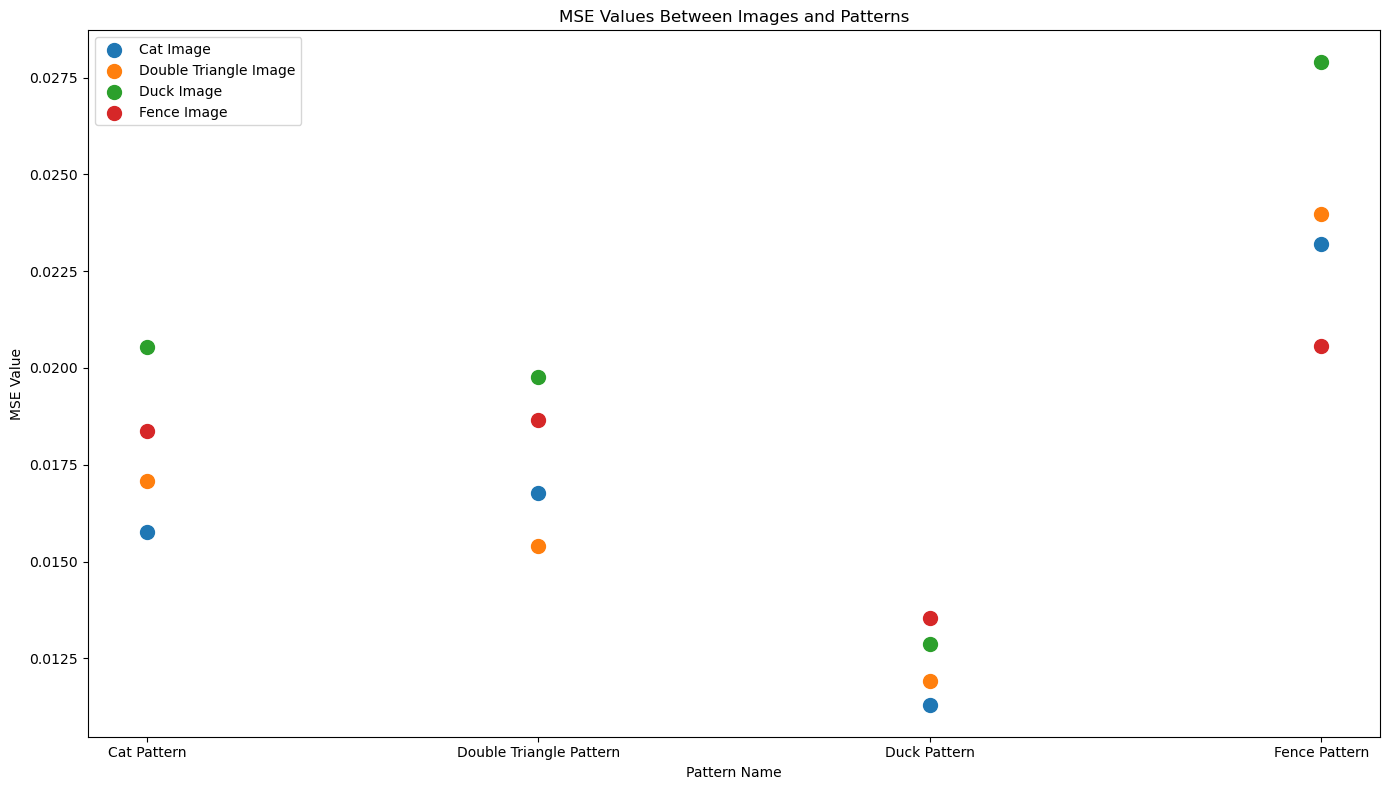

{'Cat Image': {'Cat Pattern': 0.01575772, 'Double Triangle Pattern': 0.01677725, 'Duck Pattern': 0.011307088, 'Fence Pattern': 0.023208456}, 'Double Triangle Image': {'Cat Pattern': 0.017093059, 'Double Triangle Pattern': 0.015399122, 'Duck Pattern': 0.011911071, 'Fence Pattern': 0.023972994}, 'Duck Image': {'Cat Pattern': 0.020540908, 'Double Triangle Pattern': 0.01975636, 'Duck Pattern': 0.012871387, 'Fence Pattern': 0.027889803}, 'Fence Image': {'Cat Pattern': 0.01837549, 'Double Triangle Pattern': 0.018644216, 'Duck Pattern': 0.013553393, 'Fence Pattern': 0.020563904}}


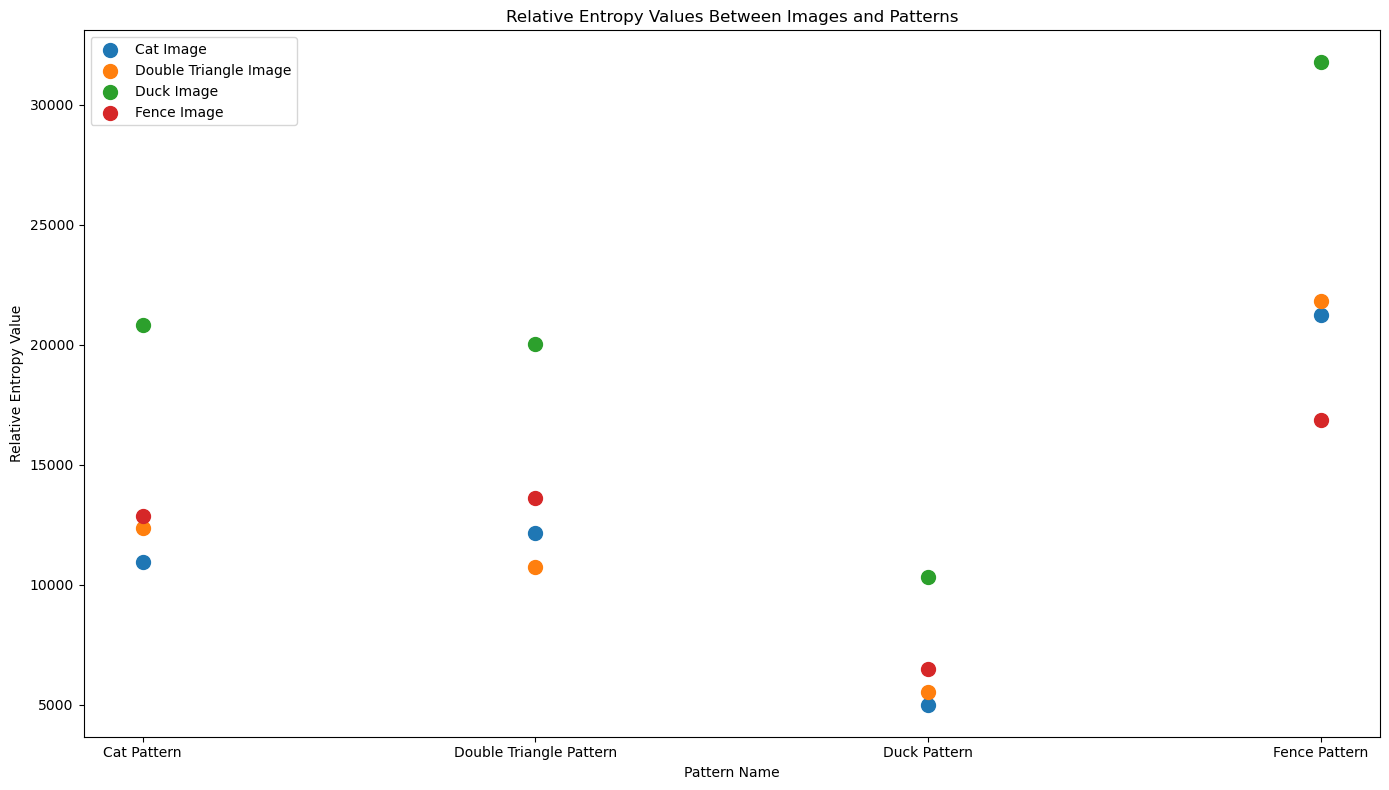

{'Cat Image': {'Cat Pattern': 10967.872, 'Double Triangle Pattern': 12146.854, 'Duck Pattern': 5009.418, 'Fence Pattern': 21257.506}, 'Double Triangle Image': {'Cat Pattern': 12352.102, 'Double Triangle Pattern': 10756.104, 'Duck Pattern': 5551.4814, 'Fence Pattern': 21808.162}, 'Duck Image': {'Cat Pattern': 20815.402, 'Double Triangle Pattern': 20047.998, 'Duck Pattern': 10341.594, 'Fence Pattern': 31768.217}, 'Fence Image': {'Cat Pattern': 12859.354, 'Double Triangle Pattern': 13608.73, 'Duck Pattern': 6496.8857, 'Fence Pattern': 16887.457}}


In [3]:
# Collect all MSE values
mse_values = {}
relative_entropy_values = {}

# Iterate over all combinations of images and patterns
for image_name, image in images.items():
    mse_values[image_name] = {}
    relative_entropy_values[image_name] = {}
    for pattern_name, pattern in patterns.items():
        # Check if both images are the same size, if not, resize
        if image.shape != pattern.shape:
            resized_image = cv2.resize(image, (pattern.shape[1], pattern.shape[0]))
        else:
            resized_image = image
        
        # Normalize the images
        pattern_norm = cv2.normalize(pattern, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        image_norm = cv2.normalize(resized_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#         pattern_norm /= np.sum(pattern_norm)
#         image_norm /= np.sum(image_norm)
        
        # Calculate MSE and store it
        mse_value = calculate_mse(image_norm, pattern_norm)
        mse_values[image_name][pattern_name] = mse_value
        
        relative_entropy_value = calculate_relative_entropy(pattern_norm, image_norm)
        relative_entropy_values[image_name][pattern_name] = relative_entropy_value

# Now let's plot the MSE values
fig, ax = plt.subplots(figsize=(14, 8))
for image_name, pattern_mse in mse_values.items():
    ax.scatter(pattern_mse.keys(), pattern_mse.values(), label=image_name, s=100)

ax.set_xlabel('Pattern Name')
ax.set_ylabel('MSE Value')
ax.set_title('MSE Values Between Images and Patterns')
ax.legend()
plt.tight_layout() 
plt.show()

print(mse_values)

fig, ax = plt.subplots(figsize=(14, 8))
for image_name, pattern_entropy in relative_entropy_values.items():
    ax.scatter(pattern_entropy.keys(), pattern_entropy.values(), label=image_name, s=100)

ax.set_xlabel('Pattern Name')
ax.set_ylabel('Relative Entropy Value')
ax.set_title('Relative Entropy Values Between Images and Patterns')
ax.legend()
plt.tight_layout()
plt.show()
print(relative_entropy_values)
